In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df_dia = pd.read_csv('dataset_non_imputed_scaled_diameter.csv')
df_abs = pd.read_csv('dataset_non_imputed_scaled_abs.csv')
df_emi = pd.read_csv('dataset_non_imputed_scaled_emission.csv')

In [3]:
input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'sol_amount_ml',
             'TOP_amount_mmol',
             'acid_amount_mmol',
             'amine_amount_mmol',
             'thiol_amount_mmol',
             'zinc_amount_mmol',
             'other_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_chloroindium oxalate',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium oxalate',
             'x0_indium palmitate',
             'x0_indium trifluoroacetate',
             'x0_indium tris(N,N-diisopropylacetamidinato)',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphine gas',
             'x1_phosphorus trichloride',
             'x1_sodium phosphide',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x1_white phosphorus',
             'x2_4-ethylpyridine',
             'x2_None',
             'x2_dimethylformamide',
             'x2_mesitylene',
             'x2_octadecene',
             'x2_toluene',
             'x3_None',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_lauric acid',
             'x4_myristic acid',
             'x4_oleic acid',
             'x4_palmitic acid',
             'x4_stearic acid',
             'x5_None',
             'x5_dioctylamine',
             'x5_dodecylamine',
             'x5_hexadecylamine',
             'x5_octylamine',
             'x5_oleylamine',
             'x6_None',
             'x6_dodecanethiol',
             'x7_None',
             'x7_zinc acetate',
             'x7_zinc bromide',
             'x7_zinc chloride',
             'x7_zinc iodide',
             'x7_zinc octanoate',
             'x7_zinc oleate',
             'x7_zinc stearate',
             'x7_zinc undecylenate',
             'x8_None',
             'x8_acetic acid',
             'x8_copper bromide',
             'x8_superhydride',
             'x8_oleic acid',
             'x8_tetrabutylammonium myristate',
             'x8_trioctylamine',
             'x8_trioctylphosphine oxide',
             'x8_water',
             'x8_zinc iodide'
            ]

#Three individual outputs:
diameter = ['diameter_nm']
emission = ['emission_nm']
absorbance = ['abs_nm']


## 85/15

In [30]:
#Splitting dataset

X_d = df_dia[input_col]
X_e = df_emi[input_col]
X_a = df_abs[input_col]

Y_d = df_dia[diameter]
Y_e = df_emi[emission]
Y_a = df_abs[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X_d, Y_d, test_size=0.15, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X_e, Y_e, test_size=0.15, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X_a, Y_a, test_size=0.15, random_state=45, shuffle=True)

## Diameter Extra Trees

In [5]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:20<00:00, 18.37s/it]

0.7263636363636364 1 21 40


## Abs Extra Trees

In [24]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:48<00:00, 19.51s/it]

10.8736559139785 6 23 16


In [17]:
ET_regr = ExtraTreesRegressor(n_estimators=6, 
                                            max_features=23,
                                            random_state=16)
            
ET_regr.fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = pd.DataFrame(ET_regr.predict(X_test_a))

In [21]:
mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
mae

29.75

## Emission Extra Trees

In [7]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:30<00:00, 18.78s/it]

15.076923076923077 1 3 13


In [39]:
## Diameter

ET_regr_d = ExtraTreesRegressor(n_estimators=1, 
                                            max_features=21,
                                            random_state=40)
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = ET_regr_d.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
D_r_2 = r2_score(Y_test_d, ET_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, ET_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, ET_Y_pred_d, squared=False)

## Emission

ET_regr_e = ExtraTreesRegressor(n_estimators=1,
                            max_features=3,     
                            random_state=13).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
E_r_2 = r2_score(Y_test_e, ET_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, ET_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, ET_Y_pred_e, squared=False)


### Absorption

ET_regr_a = ExtraTreesRegressor(n_estimators=1, 
                                            max_features=3,
                                            random_state=7).fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = ET_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
A_r_2 = r2_score(Y_test_a, ET_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, ET_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, ET_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.501309               0.726364               1.06343                    1.03123
Absorption  0.650687              23.6452               981.129                     31.323
Emission    0.839269              15.0769               448.615                     21.1805


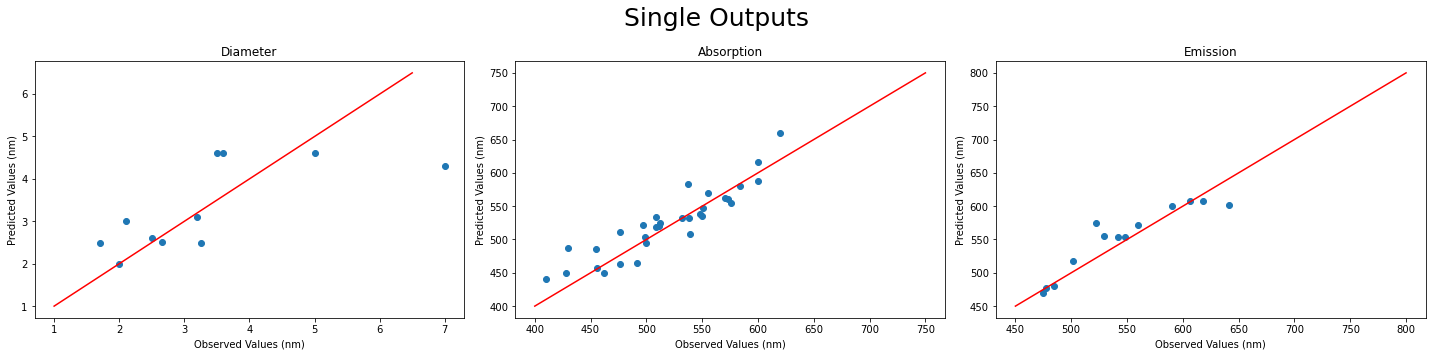

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(Y_test_d, ET_Y_pred_d,'o')
ax1.plot([1,6.5],[1,6.5], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test_a, ET_Y_pred_a,'o')
ax2.plot([400,750],[400,750], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test_e, ET_Y_pred_e,'o')
ax3.plot([450,800],[450,800], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


fig.tight_layout()

## 65/35

In [27]:
#Splitting dataset

X_d = df_dia[input_col]
X_e = df_emi[input_col]
X_a = df_abs[input_col]

Y_d = df_dia[diameter]
Y_e = df_emi[emission]
Y_a = df_abs[absorbance]


X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X_d, Y_d, test_size=0.35, random_state=45, shuffle=True)
X_train_e, X_test_e, Y_train_e, Y_test_e = train_test_split(X_e, Y_e, test_size=0.35, random_state=45, shuffle=True)
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X_a, Y_a, test_size=0.35, random_state=45, shuffle=True)

## Diameter Extra Trees

In [9]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_d, np.ravel(Y_train_d))
            ET_Y_pred_d = pd.DataFrame(ET_regr.predict(X_test_d))

            mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:06<00:00, 17.77s/it]

0.7942307692307692 3 4 30


## Abs Extra Trees

In [10]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_a, np.ravel(Y_train_a))
            ET_Y_pred_a = pd.DataFrame(ET_regr.predict(X_test_a))

            mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [07:52<00:00, 19.71s/it]

22.70694444444445 5 16 25


## Emission Extra Trees

In [11]:
min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train_e, np.ravel(Y_train_e))
            ET_Y_pred_e = pd.DataFrame(ET_regr.predict(X_test_e))

            mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [06:41<00:00, 16.74s/it]

23.83333333333334 10 15 15


In [28]:
## Diameter

ET_regr_d = ExtraTreesRegressor(n_estimators=3, 
                                            max_features=4,
                                            random_state=30)
ET_regr_d.fit(X_train_d, np.ravel(Y_train_d))
ET_Y_pred_d = ET_regr_d.predict(X_test_d)

D_mae = mean_absolute_error(Y_test_d, ET_Y_pred_d)
D_r_2 = r2_score(Y_test_d, ET_Y_pred_d)
D_mse = mean_squared_error(Y_test_d, ET_Y_pred_d)
D_rmse = mean_squared_error(Y_test_d, ET_Y_pred_d, squared=False)

## Emission

ET_regr_e = ExtraTreesRegressor(n_estimators=1,
                            max_features=3,     
                            random_state=13).fit(X_train_e, np.ravel(Y_train_e))
                  
ET_Y_pred_e = ET_regr_e.predict(X_test_e)

E_mae = mean_absolute_error(Y_test_e, ET_Y_pred_e)
E_r_2 = r2_score(Y_test_e, ET_Y_pred_e)
E_mse = mean_squared_error(Y_test_e, ET_Y_pred_e)
E_rmse = mean_squared_error(Y_test_e, ET_Y_pred_e, squared=False)


### Absorption

ET_regr_a = ExtraTreesRegressor(n_estimators=5, 
                                            max_features=16,
                                            random_state=25).fit(X_train_a, np.ravel(Y_train_a))
ET_Y_pred_a = ET_regr_a.predict(X_test_a)

A_mae = mean_absolute_error(Y_test_a, ET_Y_pred_a)
A_r_2 = r2_score(Y_test_a, ET_Y_pred_a)
A_mse = mean_squared_error(Y_test_a, ET_Y_pred_a)
A_rmse = mean_squared_error(Y_test_a, ET_Y_pred_a, squared=False)


from tabulate import tabulate

d = [ ["Diameter", D_r_2, D_mae, D_mse, D_rmse],
     ["Absorption", A_r_2, A_mae, A_mse, A_rmse],
     ["Emission", E_r_2, E_mae, E_mse, E_rmse]]

print(tabulate(d, headers=["Outputs", "R2", "Mean absolute error", "Mean squared error", "Root mean squared error"]))

Outputs           R2    Mean absolute error    Mean squared error    Root mean squared error
----------  --------  ---------------------  --------------------  -------------------------
Diameter    0.235481               0.794231               1.48156                    1.21719
Absorption  0.666699              22.7069              1101.93                      33.1954
Emission    0.286904              35.8                 2606.07                      51.0496


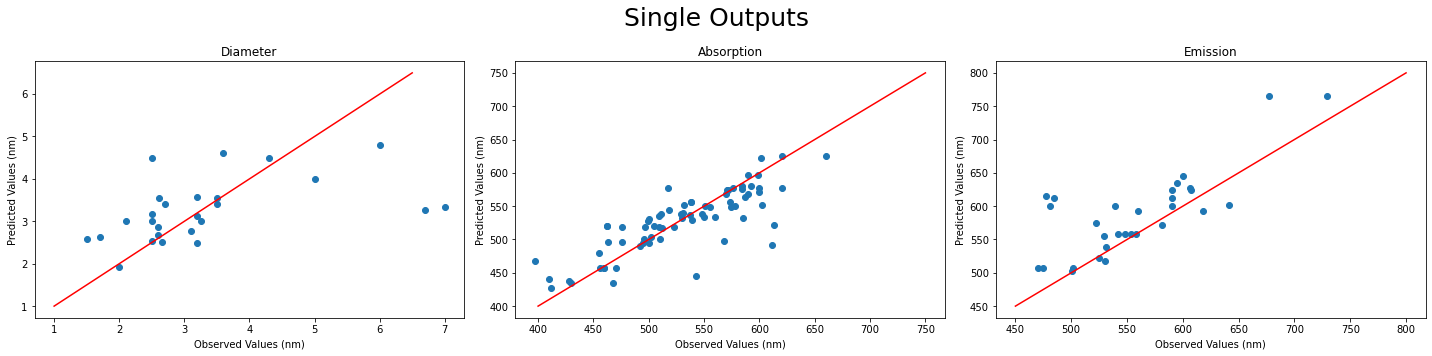

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Single Outputs', fontsize=25)

ax1.plot(Y_test_d, ET_Y_pred_d,'o')
ax1.plot([1,6.5],[1,6.5], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test_a, ET_Y_pred_a,'o')
ax2.plot([400,750],[400,750], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test_e, ET_Y_pred_e,'o')
ax3.plot([450,800],[450,800], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')


fig.tight_layout()